# Parte II - Importação Libs - EDA

In [1]:
import numpy as np
import sqlite3 as sql
from tqdm import tqdm
import glob
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV, f_classif, chi2

### Carregar DataFrame

In [10]:
Queimadas_Pantanal = pd.read_csv('Queimadas_Pantanal.csv')

In [11]:
Queimadas_Pantanal.shape

(2562, 13)

### Checando Informações

### Apresentação dos Gráficos - Parte I

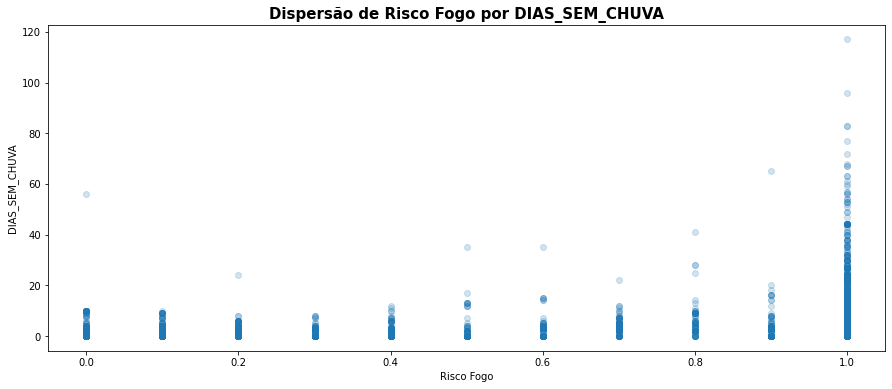

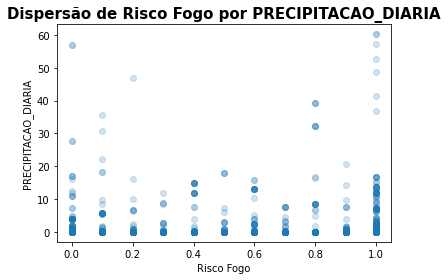

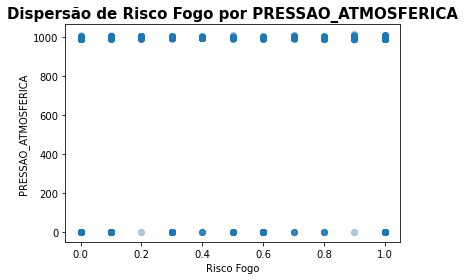

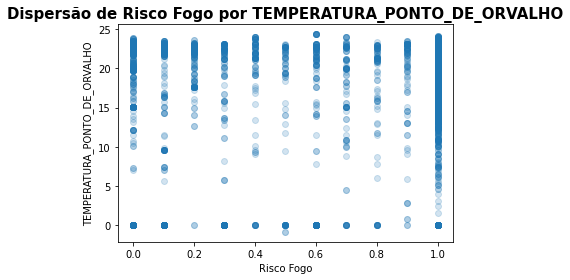

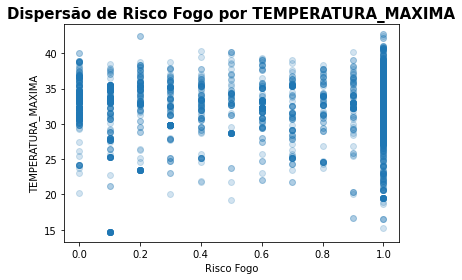

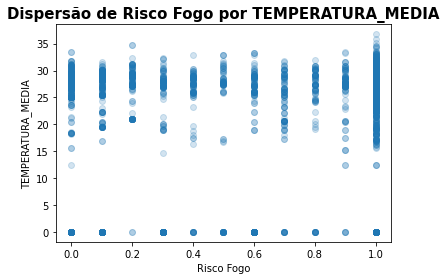

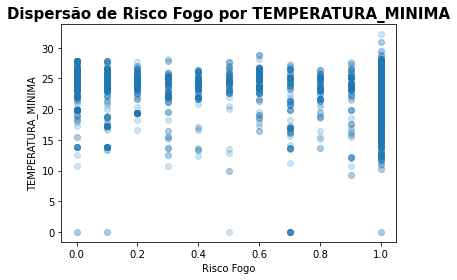

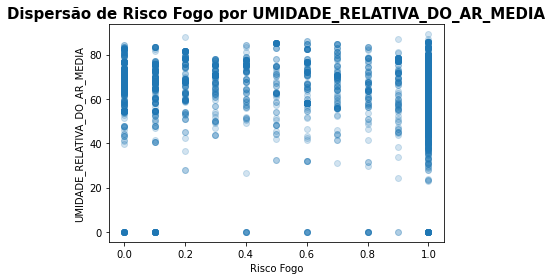

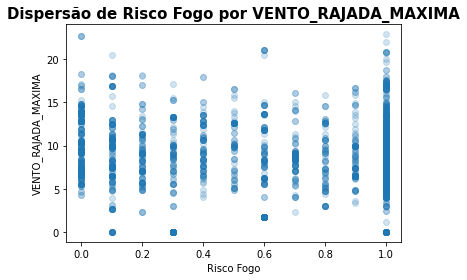

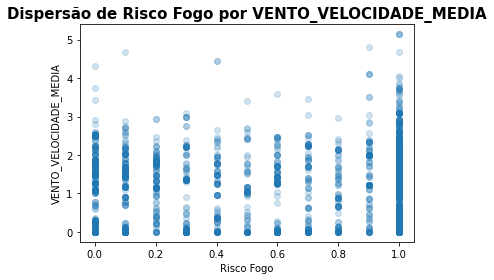

In [16]:
# Inicializa a figura
plt.figure(figsize=(15, 6))

np.set_printoptions(linewidth=50)

# Adiciona elemento de gráfico (dispersão)
cols = ['DIAS_SEM_CHUVA','PRECIPITACAO_DIARIA','PRESSAO_ATMOSFERICA','TEMPERATURA_PONTO_DE_ORVALHO',
'TEMPERATURA_MAXIMA','TEMPERATURA_MEDIA','TEMPERATURA_MINIMA','UMIDADE_RELATIVA_DO_AR_MEDIA',
'VENTO_RAJADA_MAXIMA','VENTO_VELOCIDADE_MEDIA']

for col in cols:    
    plt.scatter(
        x=Queimadas_Pantanal['RISCO_FOGO'],
        y=Queimadas_Pantanal[col],
        alpha=0.2,
    )

    # Adiciona títulos
    plt.title(f'Dispersão de Risco Fogo por {col}', fontsize=15, fontweight='bold')
    plt.xlabel('Risco Fogo')
    plt.ylabel(col)

    # Mostra o plot
    plt.show()


### Avaliação dos Gráficos

In [24]:
# Relação de Dias sem chuvas com Risco Fogo: quanto mais dias sem chover, maior o risco fogo.
# Relação de Precipitação Diária com Risco Fogo: quanto mais precipitação no dia, menor o risco de fogo. (correlação baixa)
# Relação de Temperaturas e Pressão atmosférica com Risco Fogo: há uma correlação positiva entre temperaturas e risco fogo. 
# Relação de Umidade com Risco Fogo: Correlação Negativo. Quanto maior a umidade, menor a probabilidade de Risco Fogo.
# Relação de Vento Rajada com Risco Fogo: quanto maior for a velocidade do vento rajada maxima, menor é o risco fogo.
# Relação de Vento Velocidade Media com Risco Fogo: quanto maior for a velocidade do velocidade média do vento, 
# menor é a probabilidade do risco fogo.

In [17]:
cols = ['DIAS_SEM_CHUVA','PRECIPITACAO_DIARIA','PRESSAO_ATMOSFERICA','TEMPERATURA_PONTO_DE_ORVALHO',
'TEMPERATURA_MAXIMA','TEMPERATURA_MEDIA','TEMPERATURA_MINIMA','UMIDADE_RELATIVA_DO_AR_MEDIA',
'VENTO_RAJADA_MAXIMA','VENTO_VELOCIDADE_MEDIA']

for col in cols:
    data = Queimadas_Pantanal[[col,'RISCO_FOGO']]
    correlation = data.corr(method='pearson')
    print(correlation)

                DIAS_SEM_CHUVA  RISCO_FOGO
DIAS_SEM_CHUVA        1.000000    0.373615
RISCO_FOGO            0.373615    1.000000
                     PRECIPITACAO_DIARIA  RISCO_FOGO
PRECIPITACAO_DIARIA             1.000000   -0.006925
RISCO_FOGO                     -0.006925    1.000000
                     PRESSAO_ATMOSFERICA  RISCO_FOGO
PRESSAO_ATMOSFERICA             1.000000    0.191091
RISCO_FOGO                      0.191091    1.000000
                              TEMPERATURA_PONTO_DE_ORVALHO  RISCO_FOGO
TEMPERATURA_PONTO_DE_ORVALHO                      1.000000    0.066122
RISCO_FOGO                                        0.066122    1.000000
                    TEMPERATURA_MAXIMA  RISCO_FOGO
TEMPERATURA_MAXIMA            1.000000    0.010985
RISCO_FOGO                    0.010985    1.000000
                   TEMPERATURA_MEDIA  RISCO_FOGO
TEMPERATURA_MEDIA            1.00000     0.19676
RISCO_FOGO                   0.19676     1.00000
                    TEMPERATURA_MINIMA  

### Correlação das Variáveis

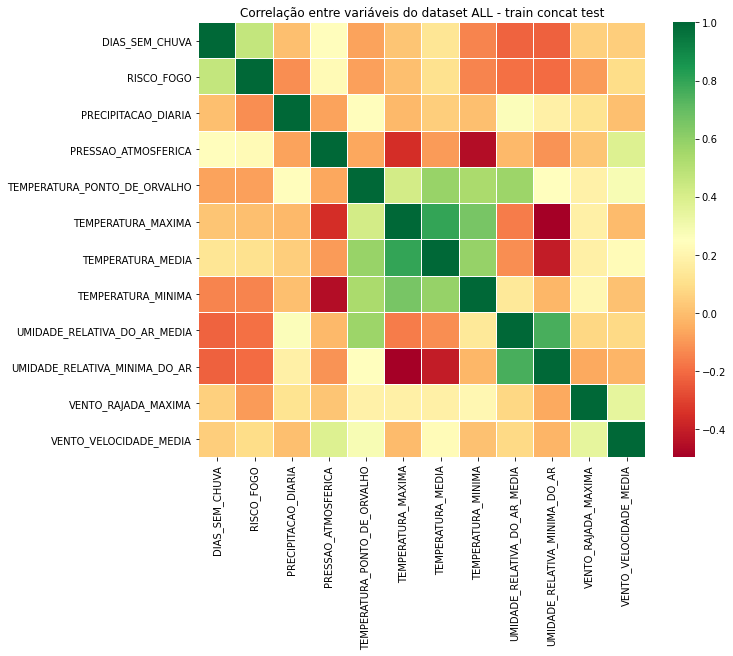

In [18]:
# heatmap
sns.heatmap(Queimadas_Pantanal.corr(method = 'spearman'),cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Correlação entre variáveis do dataset ALL - train concat test')
plt.show()

### Apresentação dos Gráficos - Parte II

In [24]:
Queimadas_Pantanal['DATE'] = pd.to_datetime(Queimadas_Pantanal['DATE'])

In [25]:
Queimadas_Pantanal['MONTH'] = Queimadas_Pantanal['DATE'].dt.month

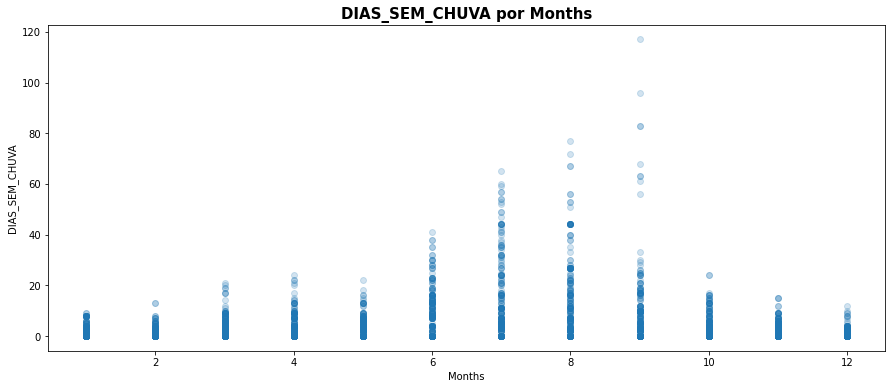

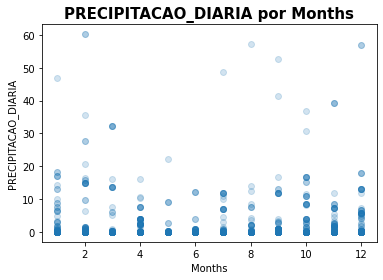

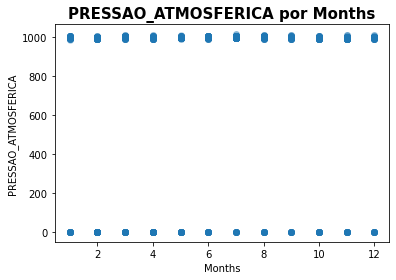

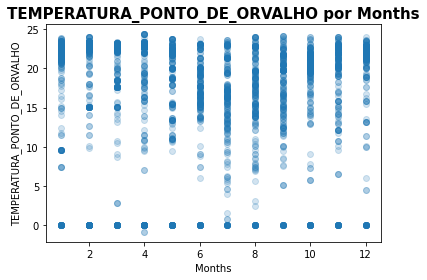

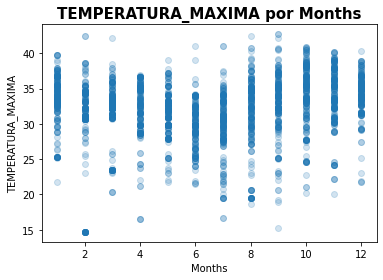

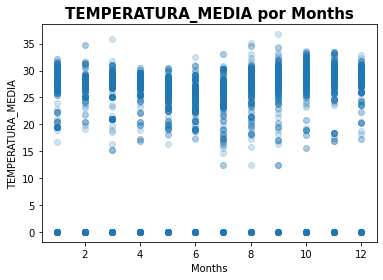

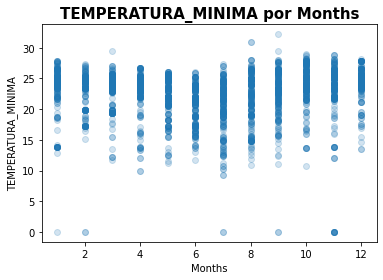

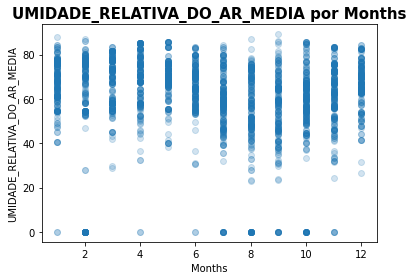

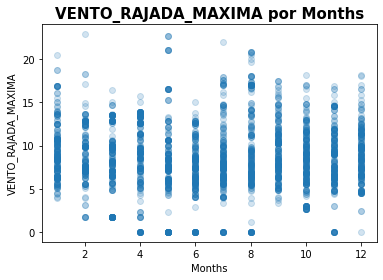

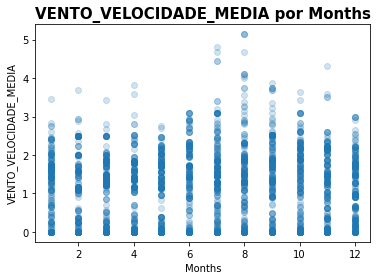

In [28]:
# Inicializa a figura
plt.figure(figsize=(15, 6))

# Adiciona elemento de gráfico (dispersão)

cols= ['DIAS_SEM_CHUVA','PRECIPITACAO_DIARIA','PRESSAO_ATMOSFERICA','TEMPERATURA_PONTO_DE_ORVALHO',
'TEMPERATURA_MAXIMA','TEMPERATURA_MEDIA','TEMPERATURA_MINIMA','UMIDADE_RELATIVA_DO_AR_MEDIA',
'VENTO_RAJADA_MAXIMA','VENTO_VELOCIDADE_MEDIA']
    
for col in cols:
    plt.scatter(
        x=Queimadas_Pantanal['MONTH'],
        y=Queimadas_Pantanal[col],
        alpha=0.2,
    )

    # Adiciona títulos
    plt.title(f'{col} por Months', fontsize=15, fontweight='bold')
    plt.xlabel('Months')
    plt.ylabel(col)

    # Mostra o plot
    plt.show()

In [30]:
Queimadas_Pantanal.drop('MONTH', axis=1, inplace=True)

In [32]:
Queimadas_Pantanal.to_csv('Queimadas_Pantanal_EDA.csv', index=False)

### Avaliação dos Gráficos

In [22]:
# Nos meses do inverno, nos quais geralmente acontecem mais queimadas, há mais dias sem chuva no período, 
# menores precipitações diárias, pressão atmosférica com níveis mais altos (o que pode gerar temperaturas mais altas,
# o que explica as amplitudes na variação de temperatura máxima e mínima nesse período). Também, pode-se observar que
# na época do inverno, há mais ventos, o que pode explicar o espalhamento do fogo, mas que não necessariamente seja motivo
# para facilitar a formação natural de queimadas das biomassas.
